## Import de Librerías

In [18]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from scipy.io import wavfile as wav
import pandas as pd
import os
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris


from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint,LearningRateScheduler
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

from statistics import mean,variance


## Creación del Dataset 

In [19]:
import numpy as np
import csv
from sklearn.datasets._base import Bunch

def num_target(target):
    
    if target == 'Blues':
        return 0
    elif target == 'Classical':
        return 1
    elif target == 'Country':
        return 2
    elif target == 'Disco':
        return 3
    elif target == 'Jazz':
        return 4
    elif target == 'Hip Hop':
        return 5
    elif target == 'Metal':
        return 6
    elif target == 'Pop':
        return 7
    elif target == 'Reggae':
        return 8
    else:
        return 9


def load_dataset():
    with open('C:/Jupyter Projects/Proyecto Final SYC/datasets/music_data.csv') as csv_file:
        data_file = csv.reader(csv_file)
        temp = next(data_file)
        n_samples = 1000 
        n_features = 4 
        feature_names = ['chroma_stft_mean','rms_mean','spectral_centroid_mean','spectral_bandwidth_mean'] 
        target_names = ['Blues','Classical','Country','Disco','Hip Hop','Jazz','Metal','Pop','Reggae','Rock'] 
        data = np.empty((n_samples, n_features))
        target = np.empty((n_samples,), dtype=np.int)

        for i, sample in enumerate(data_file):
            data[i] = np.asarray(sample[:-1], dtype=np.float)
            target[i] = np.asarray(num_target(sample[-1]), dtype=np.int)

    return Bunch(data=data, target=target, feature_names = feature_names, target_names = target_names)

data = load_dataset()


## Dataset GTZAN

In [20]:
df = pd.read_csv('C:/Jupyter Projects/Proyecto Final SYC/datasets/features_30_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


## Carga de Pista de Audio

In [21]:
audio_path = 'C:/Jupyter Projects/Proyecto Final SYC/Song_Samples/fictionmv.mp3'
x , sr = librosa.load(audio_path, duration=30.0, offset=100)

C:\Users\Cartu\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


## Recolección de Propiedades

### Chroma Frequencies

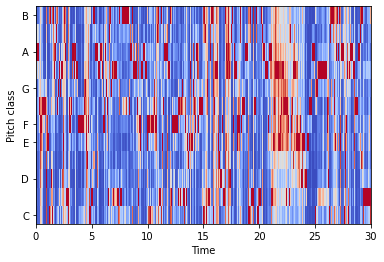

In [22]:
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=512)
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')
chrm_mean = mean(chromagram.flatten())
chrm_var = variance(chromagram.flatten(), xbar=chrm_mean)

### Root Mean Square

C:\Users\Cartu\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\Cartu\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\Cartu\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


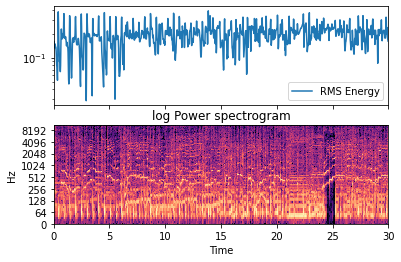

In [23]:
S, phase = librosa.magphase(librosa.stft(x))
rms = librosa.feature.rms(S=S)
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
rms_mean = mean(rms.flatten())
rms_var = variance(rms.flatten(), xbar=rms_mean)

### Spectral Centroid

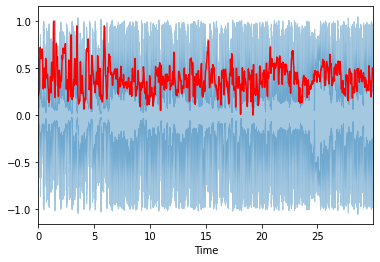

In [27]:
spectral_centroid = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroid.shape

t = librosa.frames_to_time(range(len(spectral_centroid)))

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, preprocessing.minmax_scale(spectral_centroid,axis=0),color='r')

spectc_mean = mean(spectral_centroid.flatten())
spectc_var = variance(spectral_centroid.flatten(),xbar=spectc_mean)

### Spectral Bandwidth

In [15]:
spec_bw = librosa.feature.spectral_bandwidth(x, sr=sr)
d = mean(spec_bw.flatten())

### Spectral Rolloff

### Zero Crossing Rate

### Tempo

### Mel-Frequency Cepstral Coefficient

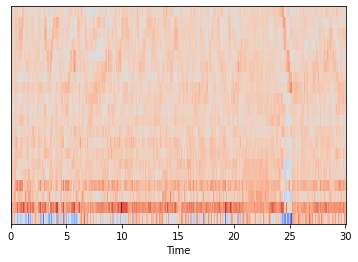

In [38]:
S = librosa.feature.melspectrogram(x, sr=sr, n_mels=128, fmax=8000)
mfcc_feat = librosa.feature.mfcc(S= librosa.power_to_db(S))

librosa.display.specshow(mfcc_feat, sr=sr, x_axis='time')

mfcc = {}
for i, mfccs in enumerate(mfcc_feat):
    mfcc['mfcc'+str(i+1)+'_mean'] = mean(mfccs.flatten())
    mfcc['mfcc'+str(i+1)+'_var'] = variance(mfccs.flatten(), xbar=mfcc['mfcc'+str(i+1)+'_mean'])



In [19]:
X, y = data.data, data.target
knn = neighbors.KNeighborsClassifier(n_neighbors=19, weights='uniform')
knn.fit(X,y)

X_pred = [a,b,c,d]
output = knn.predict([X_pred])


print ('Predicted genre: ', data.target_names[output[0]])
print('Options: ', data.target_names)
print ('Probabilities: ' ,knn.predict_proba([X_pred]))

Predicted genre:  Reggae
Options:  ['Blues', 'Classical', 'Country', 'Disco', 'Hip Hop', 'Jazz', 'Metal', 'Pop', 'Reggae', 'Rock']
Probabilities:  [[0.05263158 0.         0.10526316 0.15789474 0.21052632 0.10526316
  0.         0.10526316 0.26315789 0.        ]]
